Universidade Federal do Rio Grande do Sul (UFRGS)   
Programa de Pós-Graduação em Engenharia Civil (PPGEC)   
___
## Otimização da disposição de alvenaria em pórtico 2D

*Daniel B. M. Matos (PPGEC/UFRGS)*

*Letícia Fleck Fadel Miguel (PPGEC/UFGRS)*
___

Este *Notebook* tem como finalidade avaliar a otimização da disposição de paredes de vedação no intuito de minimizar o *storydrift* em um pórtico de concreto armado.

Primeiramente, importam-se os módulos necessários.

In [1]:
import Wall as wl                          # Módulo criado para a utilização das paredes.
from Wall import Vibmec as vib             # Classe para utilização de funções dinâmicas.
import numpy as np
import matplotlib.pyplot as plt
from pso import pso_simple                 # Módulo destinado a otimização por PSO.
from time import time

Agora, cria-se um objeto ```Vibmec``` para a realização dos procedimentos dinâmicos.

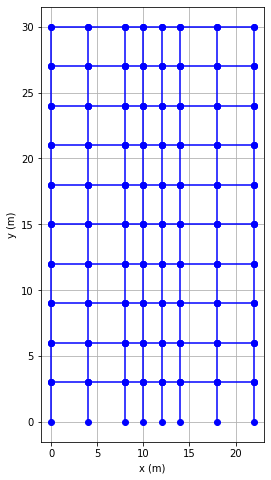

In [2]:
E = np.ones(150)*28*10**9
Port = vib('Resources/ARQUIVO_BASE.xlsx',88,E)
Port.DRAW()

Utilizando os atributos da classe, é possível restringir os graus de liberdade da base, calcular os autovalores e autovetores e definir a matriz de amortecimento do objeto.

In [3]:
Port.Restr(np.arange(24))
Port.Eig(3)
Port.Rayleigh(0.05,0.05)

1 ª frequencia natural = 2.76Hz 

2 ª frequencia natural = 7.29Hz 

3 ª frequencia natural = 13.70Hz 



Tendo o sistema modelado matematicamente, define-se o vetor de cargas com o auxílio do método de Shinouzuka e Jan, tendo como entrada o espectro de Kanai e Tajimi.

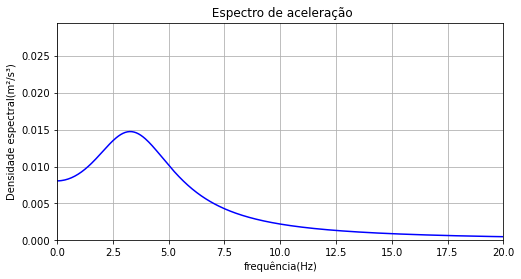

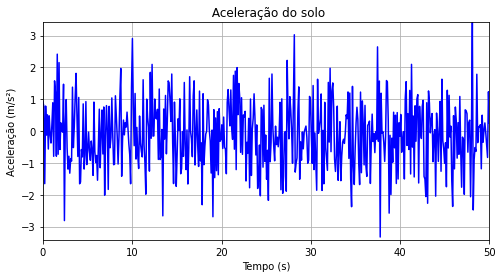

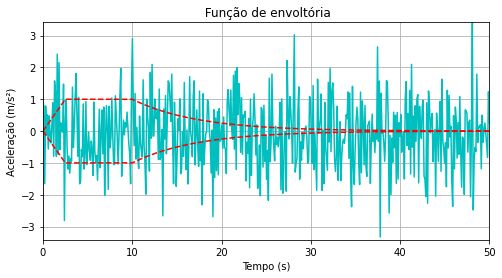

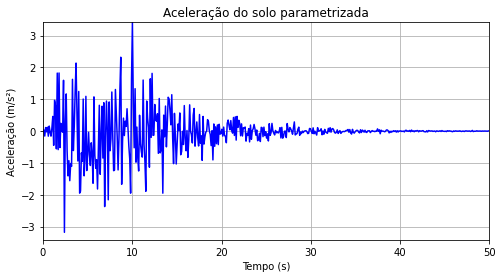

In [4]:
Port.Kanai_Tajimi(0.348,'rocha',50,0.1)
age = Port.Envolve()
F   = Port.Sismo(age)
d,v,a = Port.Newmark(F,np.zeros(240),np.zeros(240),Port.time)

Tendo em posse os valores de deslocamentos e de *Storydrifts*, inicia-se o processo de otimização estrutural. Para isso, utiliza-se o método *Particle Swarm Otimization* (PSO) para encontrar o pavimento em que a consideração da alvenaria de vedação como sistema de contraventamento minimiza o *Storydrift* do edifício.

In [5]:
# Definição da função objetivo
def func1(x):
    
    Port.Wall(88,x,np.arange(24))
    d1,v1,a1 = Port.Newmark(F,np.zeros(240),np.zeros(240),Port.time,Wall = True)
    sdmax1 = vib.Storydrift(d1)
    
    return np.max(sdmax1)

iter:    0, Melhor solução: -1.00000000, Andar: []
iter:    1, Melhor solução: 0.00522959, Andar: [5]
iter:    2, Melhor solução: 0.00454003, Andar: [4]
iter:    3, Melhor solução: 0.00425313, Andar: [3]
iter:    4, Melhor solução: 0.00343567, Andar: [2]
iter:    5, Melhor solução: 0.00343567, Andar: [2]
iter:    6, Melhor solução: 0.00343567, Andar: [2]
iter:    7, Melhor solução: 0.00343567, Andar: [2]
iter:    8, Melhor solução: 0.00343567, Andar: [2]
iter:    9, Melhor solução: 0.00343567, Andar: [2]

Solução final:
   > [2]
   > 0.0034356678153348967

O tempo de processamento foi de 20.16 segundos


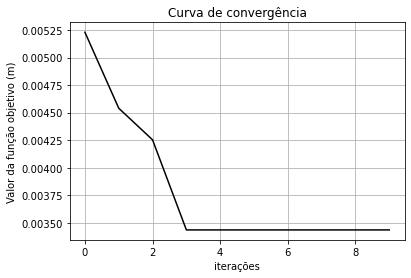

In [15]:
initial = [5]           # Valor inicial
bounds  = [(0,8)]       # Valores limite
t1 = time()
e,p,i = pso_simple.minimize(func1, initial, bounds, num_particles=20, maxiter=10, verbose=True)
t2 = time()
print('O tempo de processamento foi de {:.2f} segundos'.format(t2-t1))
plt.figure(1,figsize = (6,4))
plt.plot(i,p,'k')
plt.title('Curva de convergência')
plt.xlabel('iterações')
plt.ylabel('Valor da função objetivo (m)')
plt.grid(True)


Após o processo de otmização, tendo em posse o pavimento em que a alvenaria minimiza o *Storydrift* do edifício, é possível plotar a comparação entre as duas simulações em termos de deslocamentos no último pavimento e máximo *storydrif* por andar.

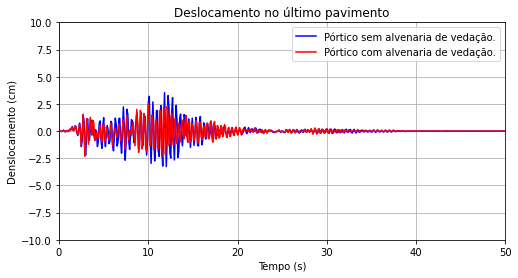

In [16]:
Port.Wall(88,2,np.arange(24))
d1,v1,a1 = Port.Newmark(F,np.zeros(240),np.zeros(240),Port.time,Wall = True)
sdmax1 = vib.Storydrift(d1)


plt.figure(2,figsize=(8,4))
plt.plot(Port.time,d[237,:]*100,'b',label = 'Pórtico sem alvenaria de vedação.')
plt.plot(Port.time,d1[237,:]*100,'r',label = 'Pórtico com alvenaria de vedação.')
plt.xlabel('Tempo (s)'); plt.ylabel('Denslocamento (cm)');
plt.xlim(0,50); plt.ylim(-10,10); plt.title('Deslocamento no último pavimento')
plt.legend()
plt.grid(True)

sdmax = vib.Storydrift(d)
andar = np.arange(11)

[0.         0.00242459 0.00441677 0.00466442 0.00451154 0.00413195
 0.00372253 0.00430974 0.00349126 0.00247598 0.00138138]


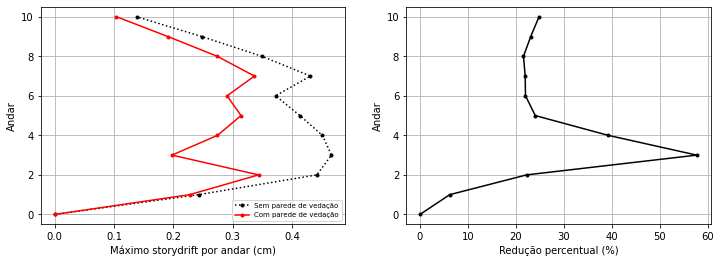

In [38]:
plt.figure(3,figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(sdmax*100,andar,'k:.',label='Sem parede de vedação')
plt.plot(sdmax1*100,andar,'r.-',label = 'Com parede de vedação')
plt.xlabel('Máximo storydrift por andar (cm)')
plt.ylabel('Andar')
plt.legend(loc='lower right',fontsize='x-small')
plt.grid(True)

r = np.zeros(len(sdmax))
r[1:] = (sdmax[1:]-sdmax1[1:])/sdmax[1:]*100
print(sdmax)
plt.subplot(1,2,2)
plt.plot(r,andar,'k.-')
plt.xlabel('Redução percentual (%)')
plt.ylabel('Andar')
plt.grid(True)


Portanto, percebe-se que a utilização da alvenaria como sistema de contraventamento, apesar de utilizada em apenas um pavimento, pode reduzir significativamente o *storydruft* de uma edificação submetida a um sismo.

### Próximos passos:

* Reafazer a análise utilizando sismos reais 
* Refazer a análise com diferentes pórticos para verificar algum padrão